In [1]:
# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List
import matplotlib.pyplot as plt
import numpy as np

def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

def plot(score_path):
    loss = np.load(score_path)
    plt.figure()
    #plt.yscale("log")
    plt.plot(smooth(loss,0.99))
    plt.show()
# loss = np.load(loss_path.replace("score","loss"))
# plt.figure()
# #plt.yscale("log")
# plt.plot(smooth(loss,0.99))

In [2]:
import subprocess
from datetime import datetime


def create_env(
    INV_TEMP=50,
    ARGMAX=False,
    ALPHA=0.6,
    BETA=1,
    TRANSITION_HISTORY_SIZE=500000,
    REQUIRE_HISTORY=150000,
    BATCH_SIZE=2000,
    GAMMA=0.97,
    EPSILON_INIT=0.4,
    LR_INIT=0.001,
    EPSILON_DECAY_FACTOR=0.5,
    LR_DECAY_FACTOR=0.5,
    BOMB_SHAPE=True,
):
    template = f"""INV_TEMP={str(INV_TEMP)}
ARGMAX={str(ARGMAX)}
ALPHA={str(ALPHA)}
BETA={str(BETA)}

TRANSITION_HISTORY_SIZE={str(TRANSITION_HISTORY_SIZE)}
REQUIRE_HISTORY={str(REQUIRE_HISTORY)}
BATCH_SIZE={str(BATCH_SIZE)}
GAMMA={str(GAMMA)}
EPSILON_INIT={str(EPSILON_INIT)}
LR_INIT={str(LR_INIT)}

EPSILON_DECAY_FACTOR={str(EPSILON_DECAY_FACTOR)}
LR_DECAY_FACTOR={str(LR_DECAY_FACTOR)}

BOMB_SHAPE={str(BOMB_SHAPE)}
"""
    with open("./agent_code/DALBomber_test/.env", "w") as writefile:
        writefile.write(template)
    now = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
    with open(f"./agent_code/DALBomber_test/.env_{now}", "w") as writefile:
        writefile.write(template)


def run_train(scenario, agents, rounds):
    command = "python main.py play --scenario {} --agents {} --n-rounds {} --train 1 --no-gui --single-process".format(
        scenario, agents, rounds
    )
    a = subprocess.call(command.format(scenario, agents, rounds).split(" "))


def run_eval(
    scenario,
    agents,
    rounds,
):

    command = "python main.py play --scenario {} --agents {} --n-rounds {} --train 0 --continue-without-training --no-gui --save-stats --single-process".format(
        scenario, agents, rounds
    )

    a = subprocess.call(command.format(scenario, agents, rounds).split(" "))
    now = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
    with open(f"./results/{now}_stats.txt", "w") as writefile:
        writefile.write(f"{command}")

In [3]:
base_env_dict = {
    "INV_TEMP": 50,
    "ARGMAX": False,
    "ALPHA": 0.6,
    "BETA": 1,
    "TRANSITION_HISTORY_SIZE": 500000,
    "REQUIRE_HISTORY": 150000,
    "BATCH_SIZE": 2000,
    "GAMMA": 0.97,
    "EPSILON_INIT": 0.4,
    "LR_INIT": 0.001,
    "EPSILON_DECAY_FACTOR": 0.5,
    "LR_DECAY_FACTOR": 0.5,
    "BOMB_SHAPE": True,
}
env1 = base_env_dict.copy()
env2= base_env_dict.copy()
env2["ALPHA"] = 0
env3= base_env_dict.copy()
env3["ALPHA"]=0
env3["BOMB_SHAPE"]= False
env4= base_env_dict.copy()
env4["ALPHA"]=0
env4["BOMB_SHAPE"]= False
env4["GAMMA"]=0.7
env5= base_env_dict.copy()
env5["BOMB_SHAPE"]=False

summary_envs = {1:"all methods",2:"no PER",3:"No PER, no Reward Shaping",4:"No PER, no Reward Shaping, Lower Gamma",
                5:"no Reward Shaping"}

param_dicts = [env1,env2,env3,env4,env5]

In [13]:
import shutil
scenario= "coin-heaven"
me = "DALBomber_test"
agents = f"{me}"
train_rounds = 26000
eval_rounds = 500
for index,env_dict in enumerate(param_dicts,1):
    # index starts with 1 to match param_dicts, env naming
    shutil.copy("./agent_code/DALBomber_test/untrained_model.pth","./agent_code/DALBomber_test/model.pth")
    create_env(**env_dict)
    run_train(scenario,agents,train_rounds)
    shutil.copy("./agent_code/DALBomber_test/model.pth",f"./agent_code/DALBomber_test/model_{index}.pth")
    shutil.copy("./agent_code/DALBomber_test/logs/DALBomber_test.log",f"agent_code/DALBomber_test/logs/DALBomber_test.log_{index}")
    run_eval(scenario,agents,eval_rounds)
#646 minutes!

BOMB_SHAPE=True
ALPHA=0.6
BETA=1.0
<module 'agent_code.DALBomber_test.train' from '/home/david/dev/ss24_ReinforcementLearning_BomberMan/agent_code/DALBomber_test/train.py'>


100%|██████████| 500/500 [03:30<00:00,  2.38it/s]


BOMB_SHAPE=True
ALPHA=0.0
BETA=1.0
<module 'agent_code.DALBomber_test.train' from '/home/david/dev/ss24_ReinforcementLearning_BomberMan/agent_code/DALBomber_test/train.py'>


100%|██████████| 500/500 [03:29<00:00,  2.38it/s]


BOMB_SHAPE=False
ALPHA=0.0
BETA=1.0
<module 'agent_code.DALBomber_test.train' from '/home/david/dev/ss24_ReinforcementLearning_BomberMan/agent_code/DALBomber_test/train.py'>


100%|██████████| 500/500 [03:06<00:00,  2.69it/s]


BOMB_SHAPE=False
ALPHA=0.0
BETA=1.0
<module 'agent_code.DALBomber_test.train' from '/home/david/dev/ss24_ReinforcementLearning_BomberMan/agent_code/DALBomber_test/train.py'>


100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


BOMB_SHAPE=False
ALPHA=0.6
BETA=1.0
<module 'agent_code.DALBomber_test.train' from '/home/david/dev/ss24_ReinforcementLearning_BomberMan/agent_code/DALBomber_test/train.py'>


100%|██████████| 500/500 [03:13<00:00,  2.59it/s]


2024.09.28-05.41.12_score_history.npy
2024.09.28-07.56.36_score_history.npy
2024.09.28-10.12.56_score_history.npy
2024.09.28-12.16.07_score_history.npy
2024.09.28-14.19.53_score_history.npy


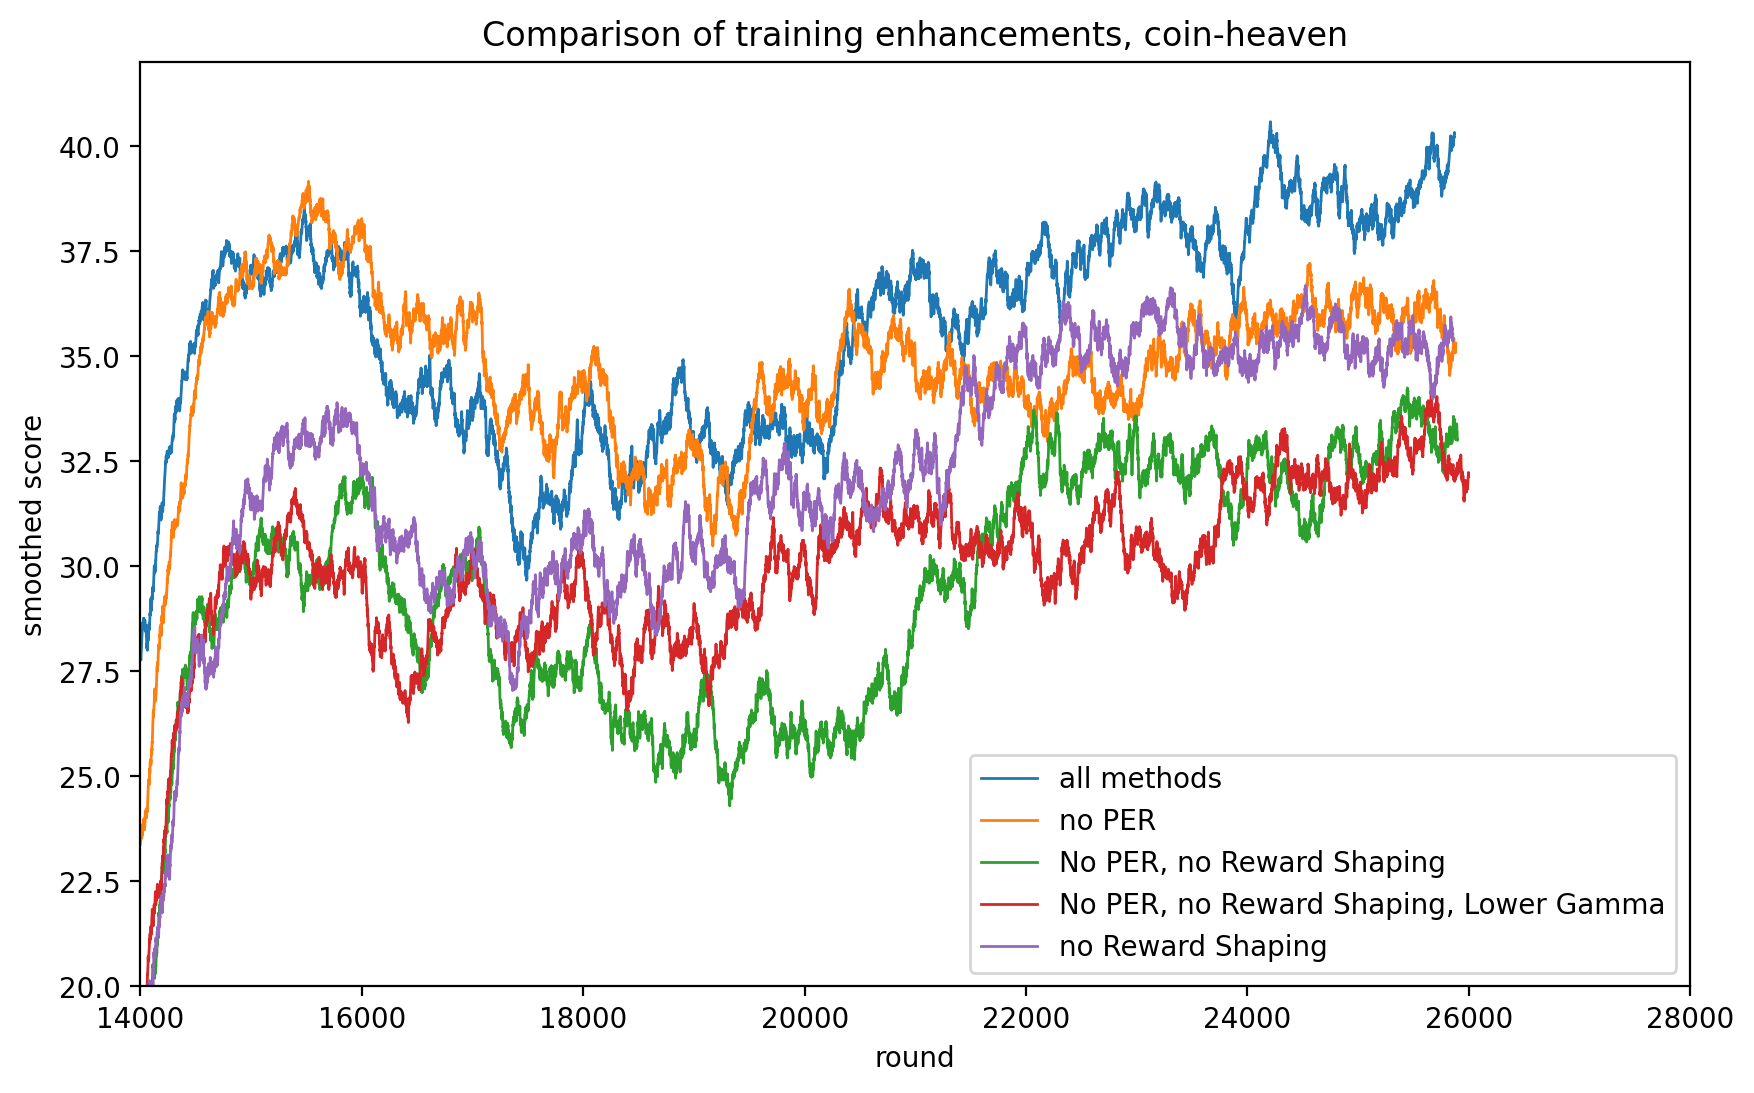

In [85]:
import os
folder = "./"
files = os.listdir(folder)
files=[file for file in files if "_score_" in file]
files.sort()
plt.figure(figsize=(10, 6),dpi=200)
arrays = {}
for index,file in enumerate(files,1):
    print(file)
    plt.plot(arr:=smooth( np.load(folder+file),0.995),label=summary_envs[index],linewidth="1")
    arrays[index]= arr
plt.ylim(20,42)
plt.xlim(14000,28000)
plt.xlabel("round")
plt.ylabel("smoothed score")
plt.title("Comparison of training enhancements, coin-heaven")
plt.legend(loc="lower right")

1 898
2 1064
3 1104
4 884
5 1073


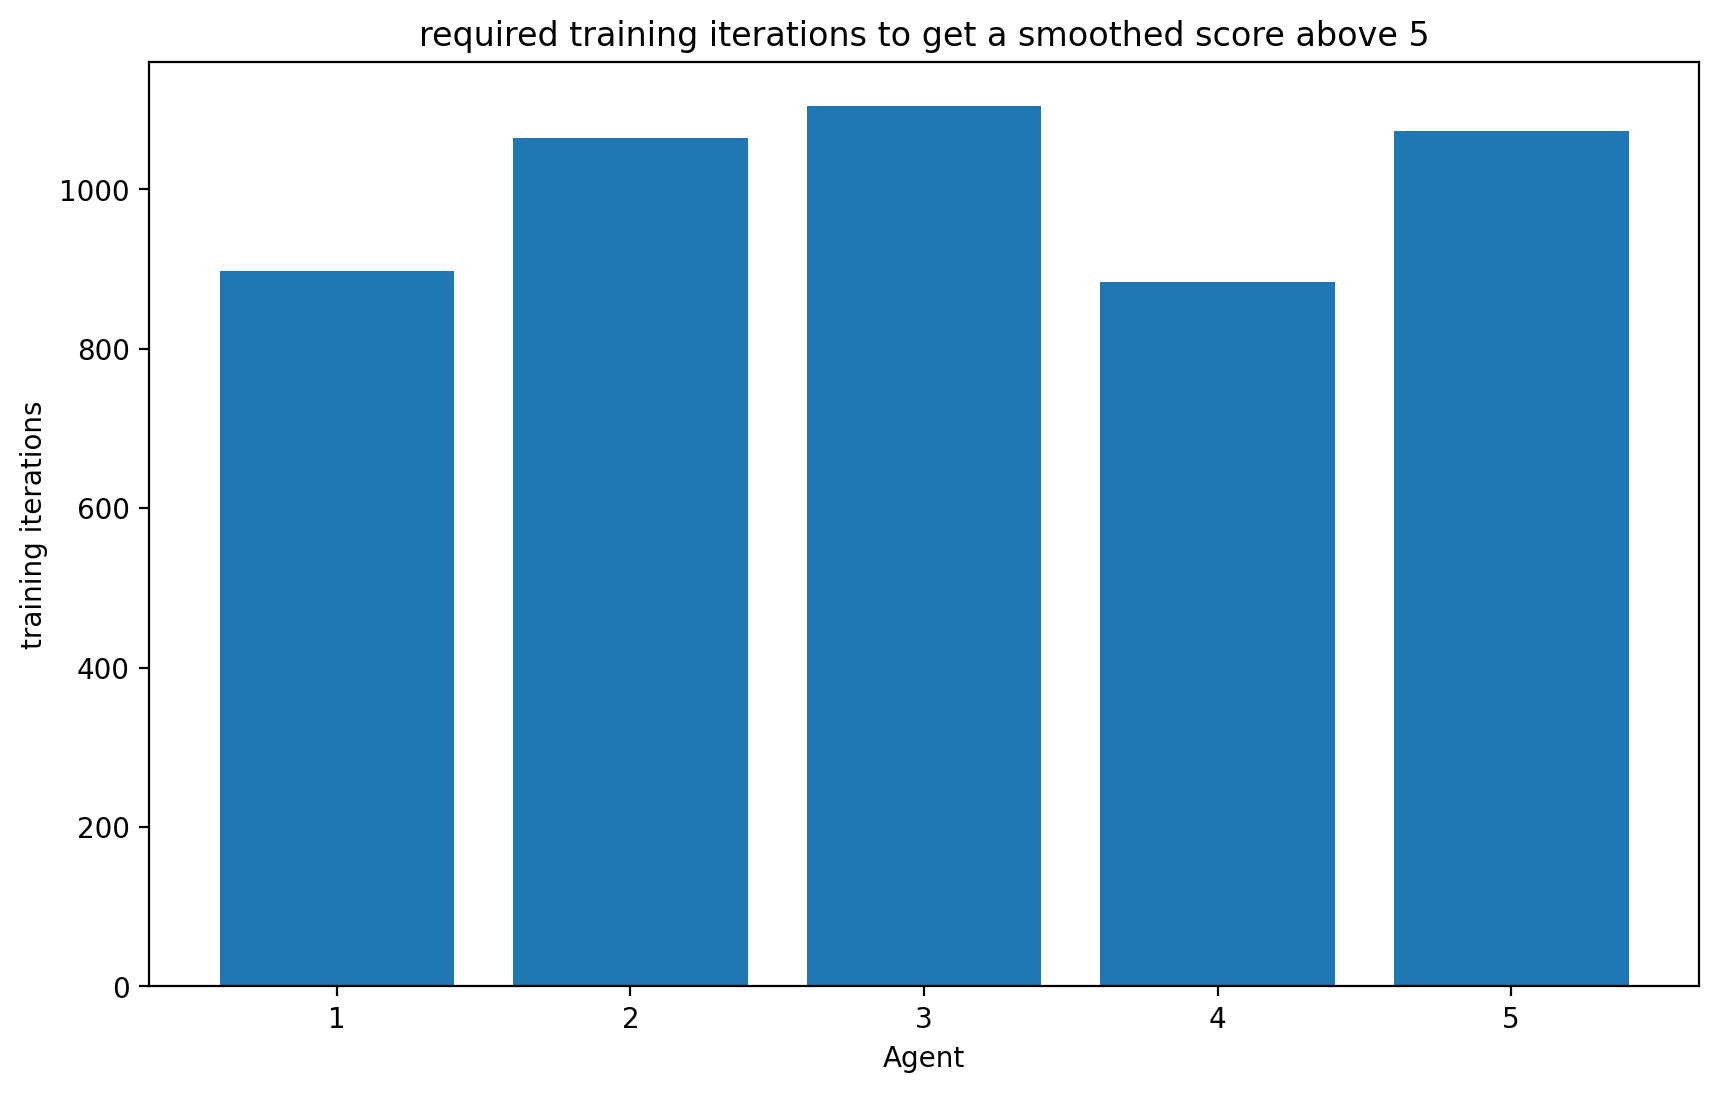

1 1249
2 1378
3 1525
4 1256
5 1438


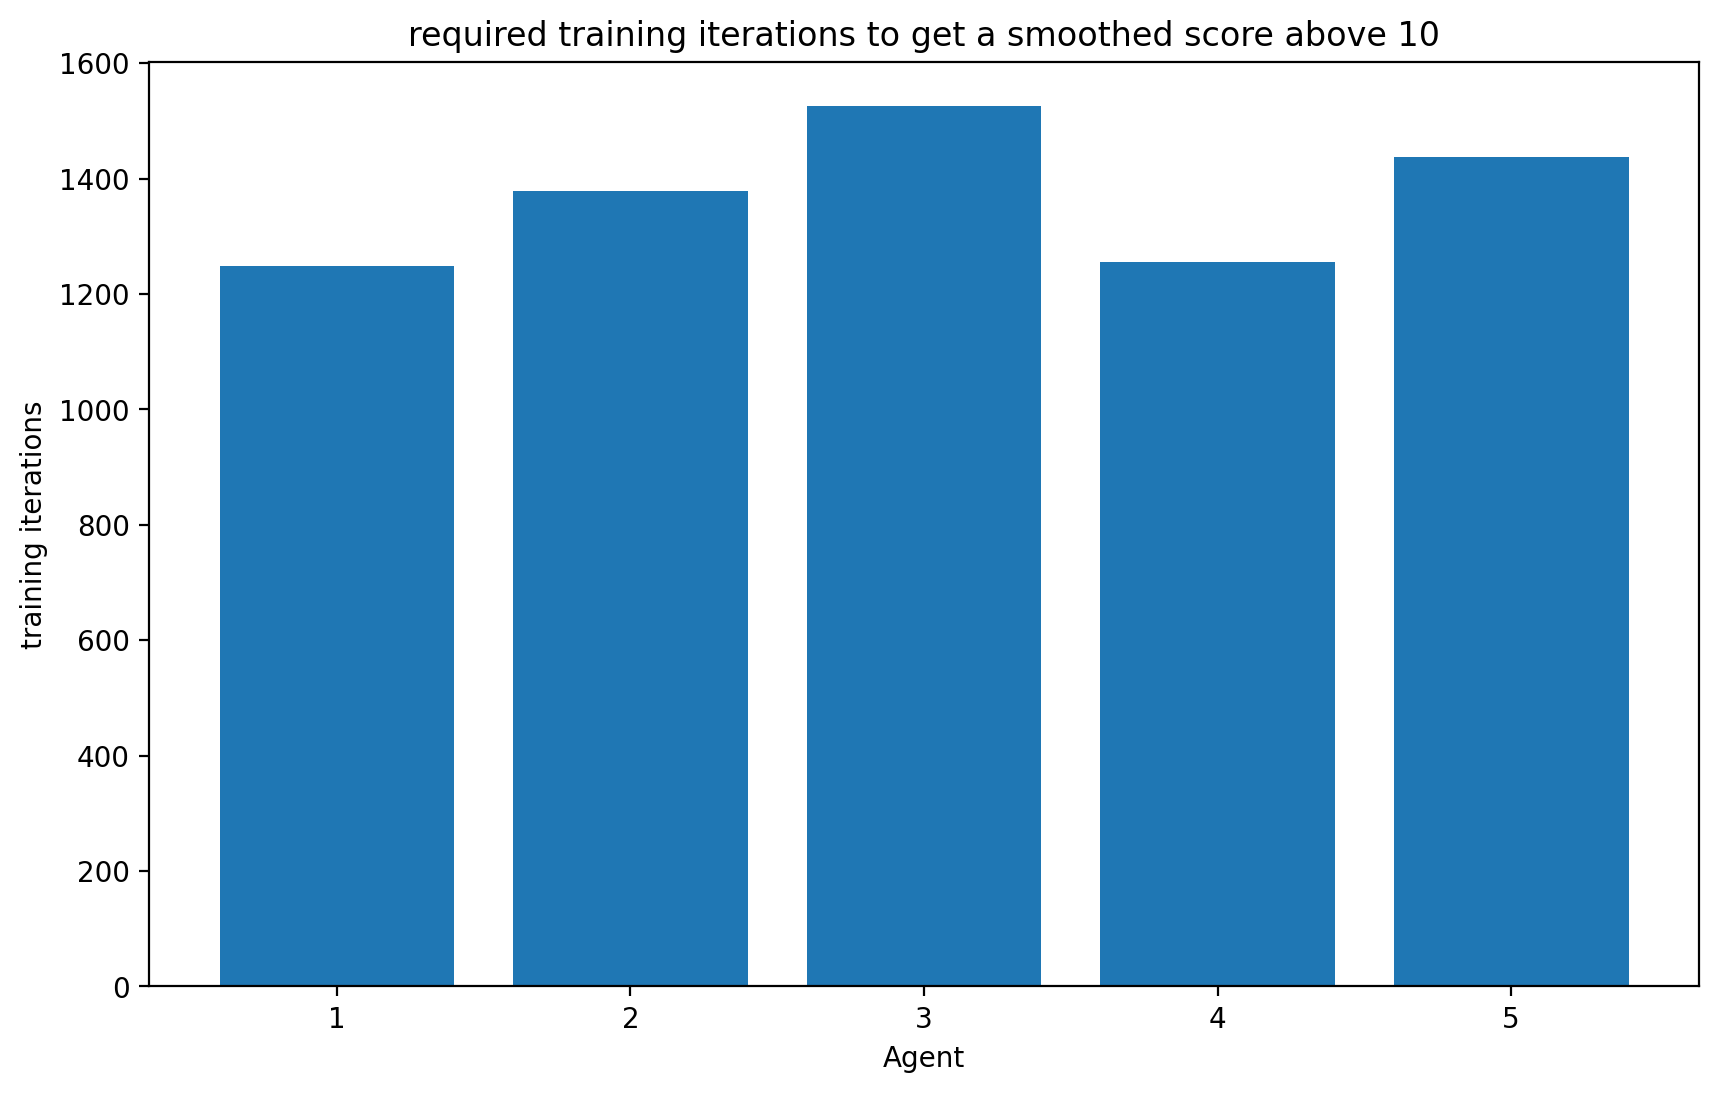

1 1384
2 1604
3 1778
4 1555
5 1698


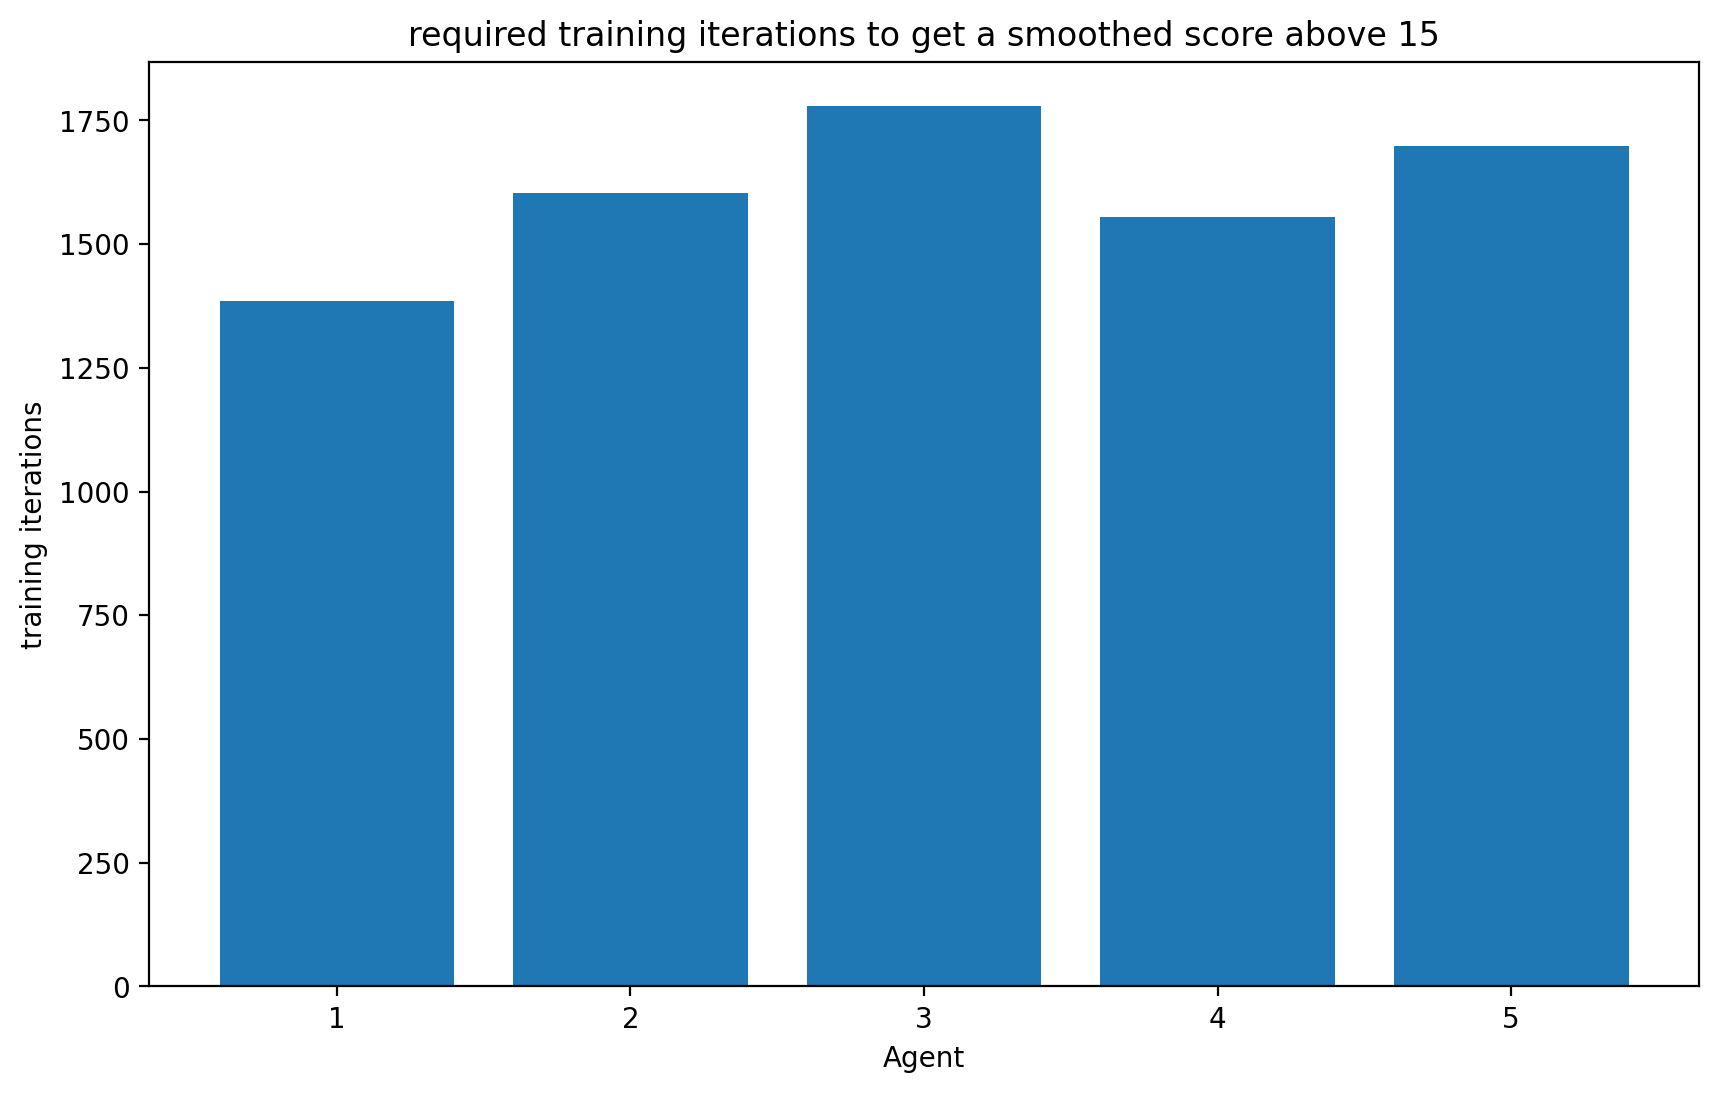

1 1553
2 1775
3 2106
4 2056
5 2080


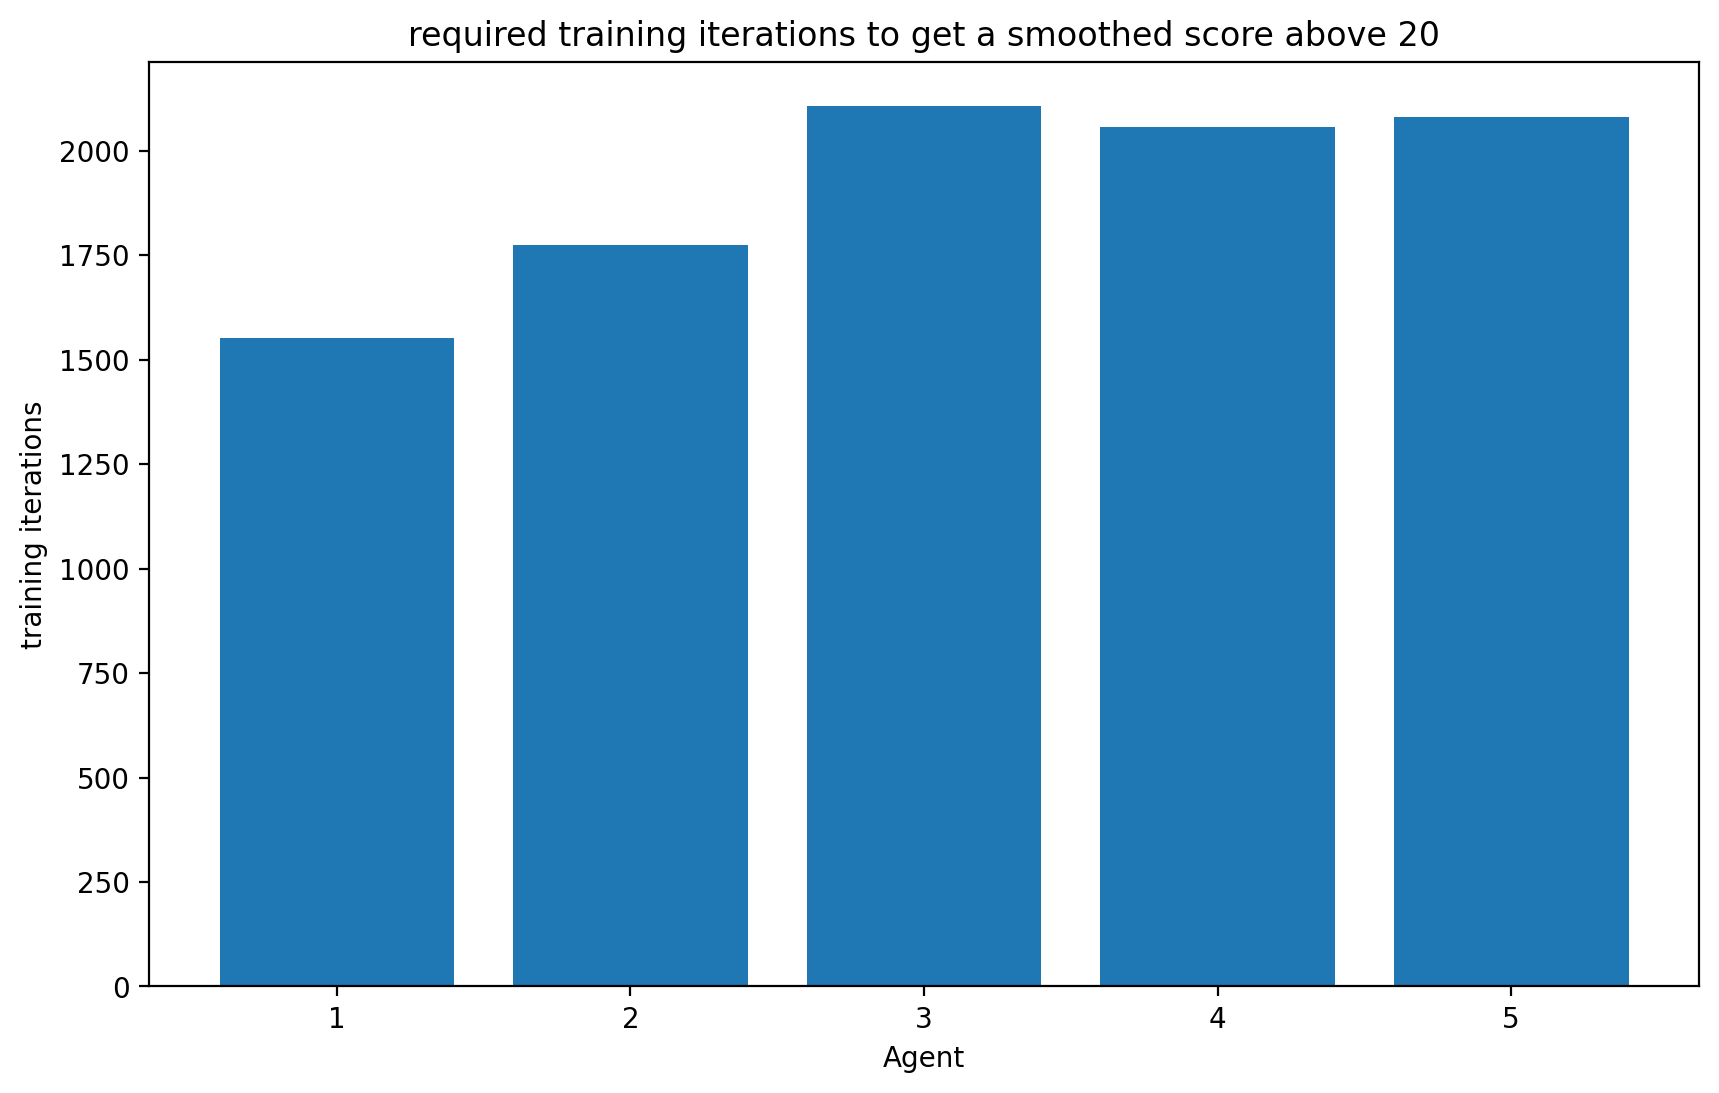

1 1666
2 1990
3 2219
4 2202
5 2244


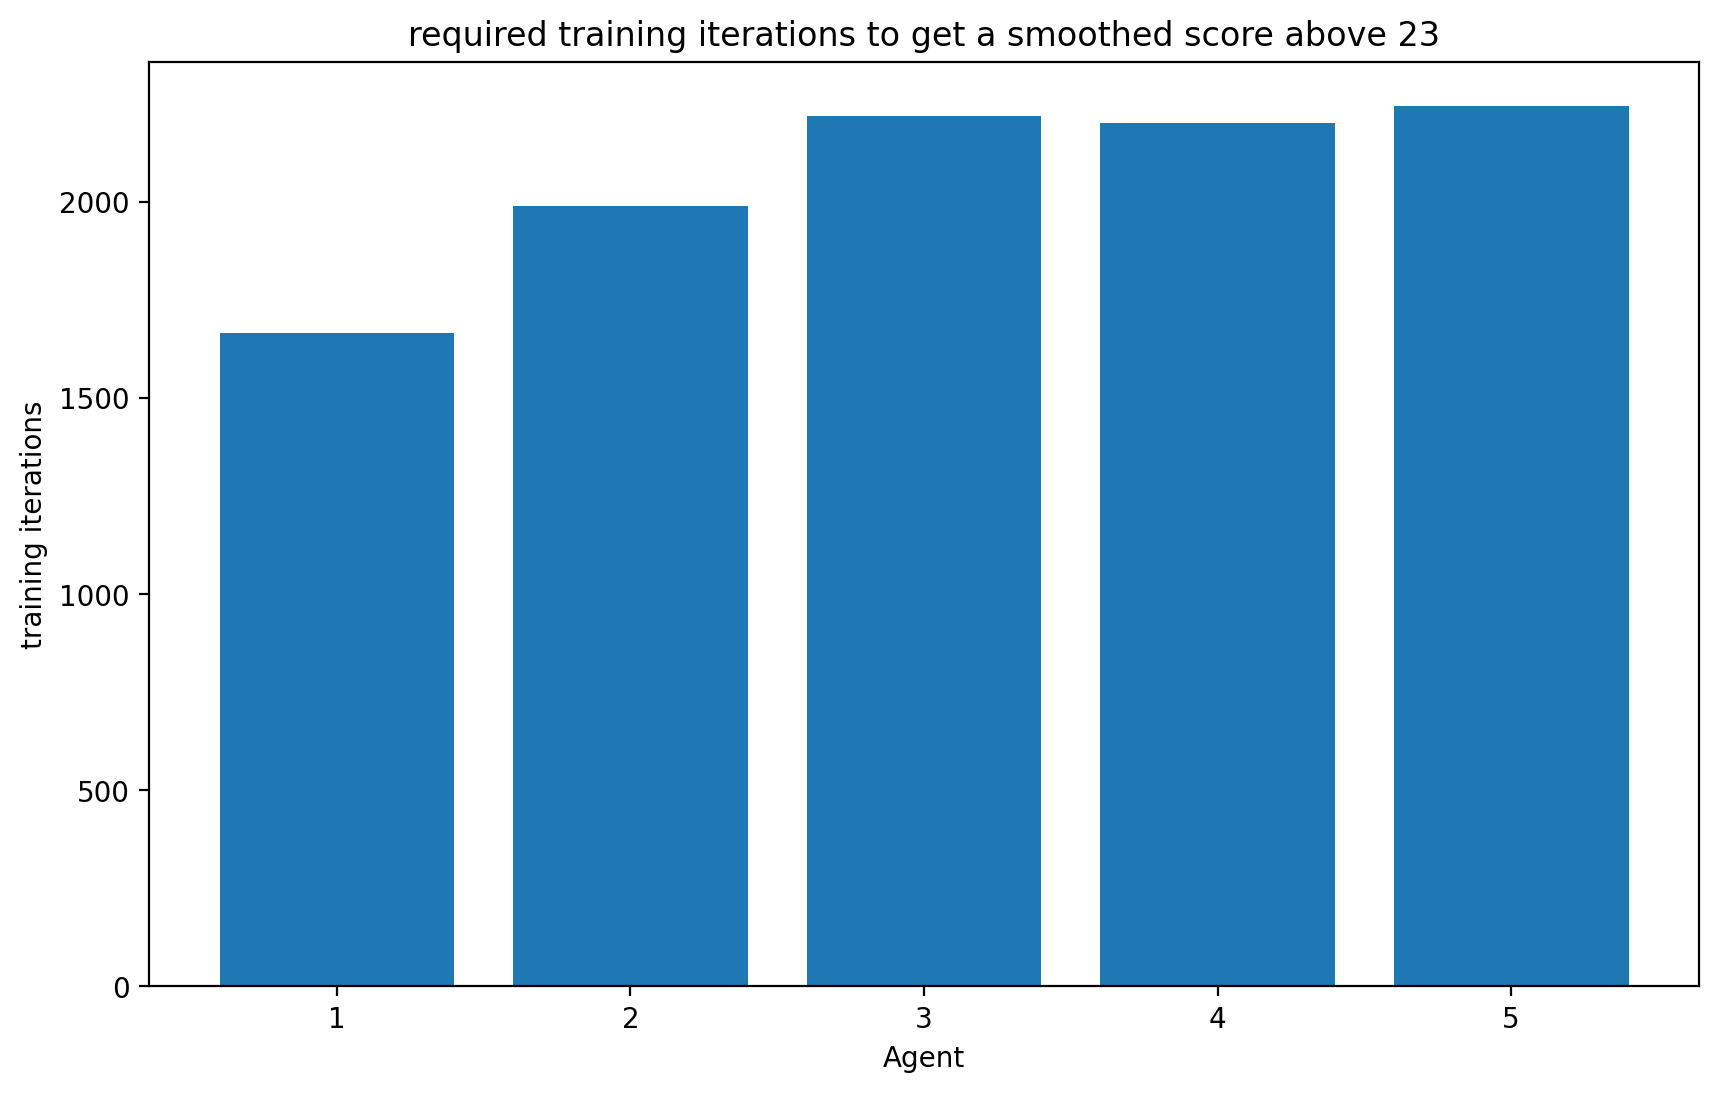

1 1758
2 2084
3 2288
4 2271
5 2338


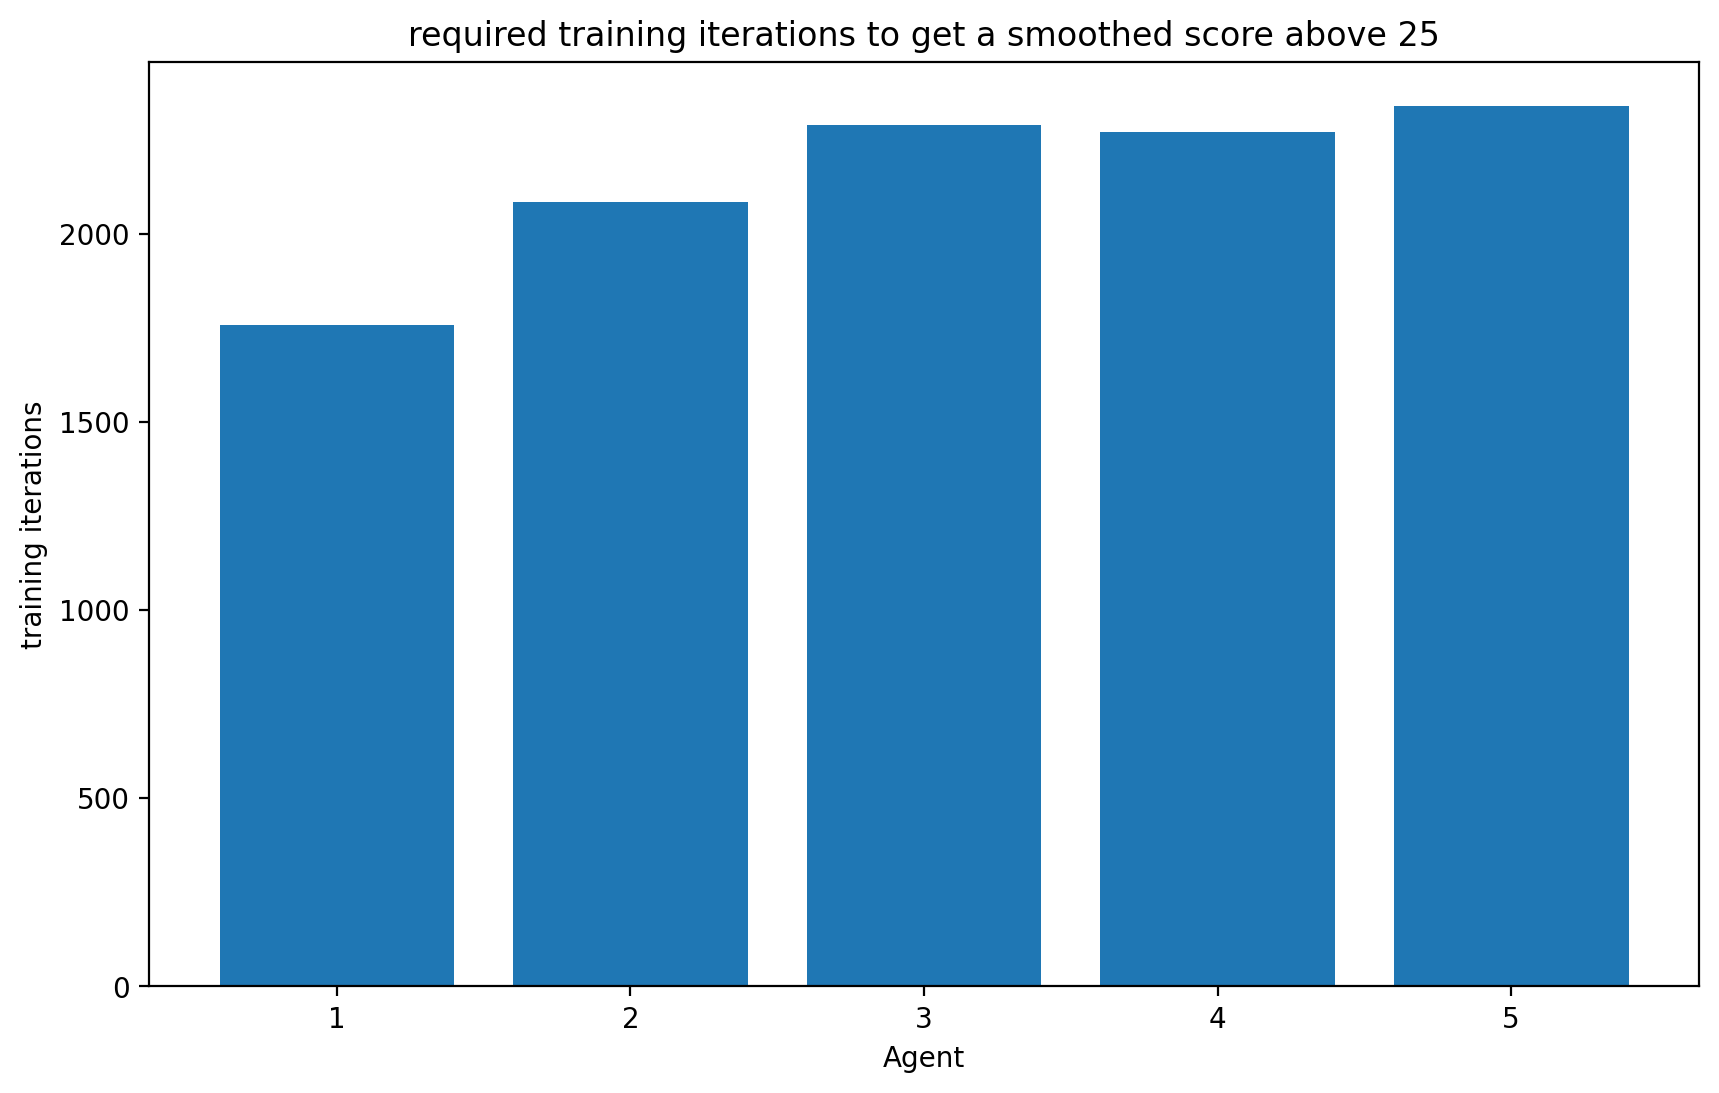

1 1840
2 2130
3 2360
4 2363
5 2397


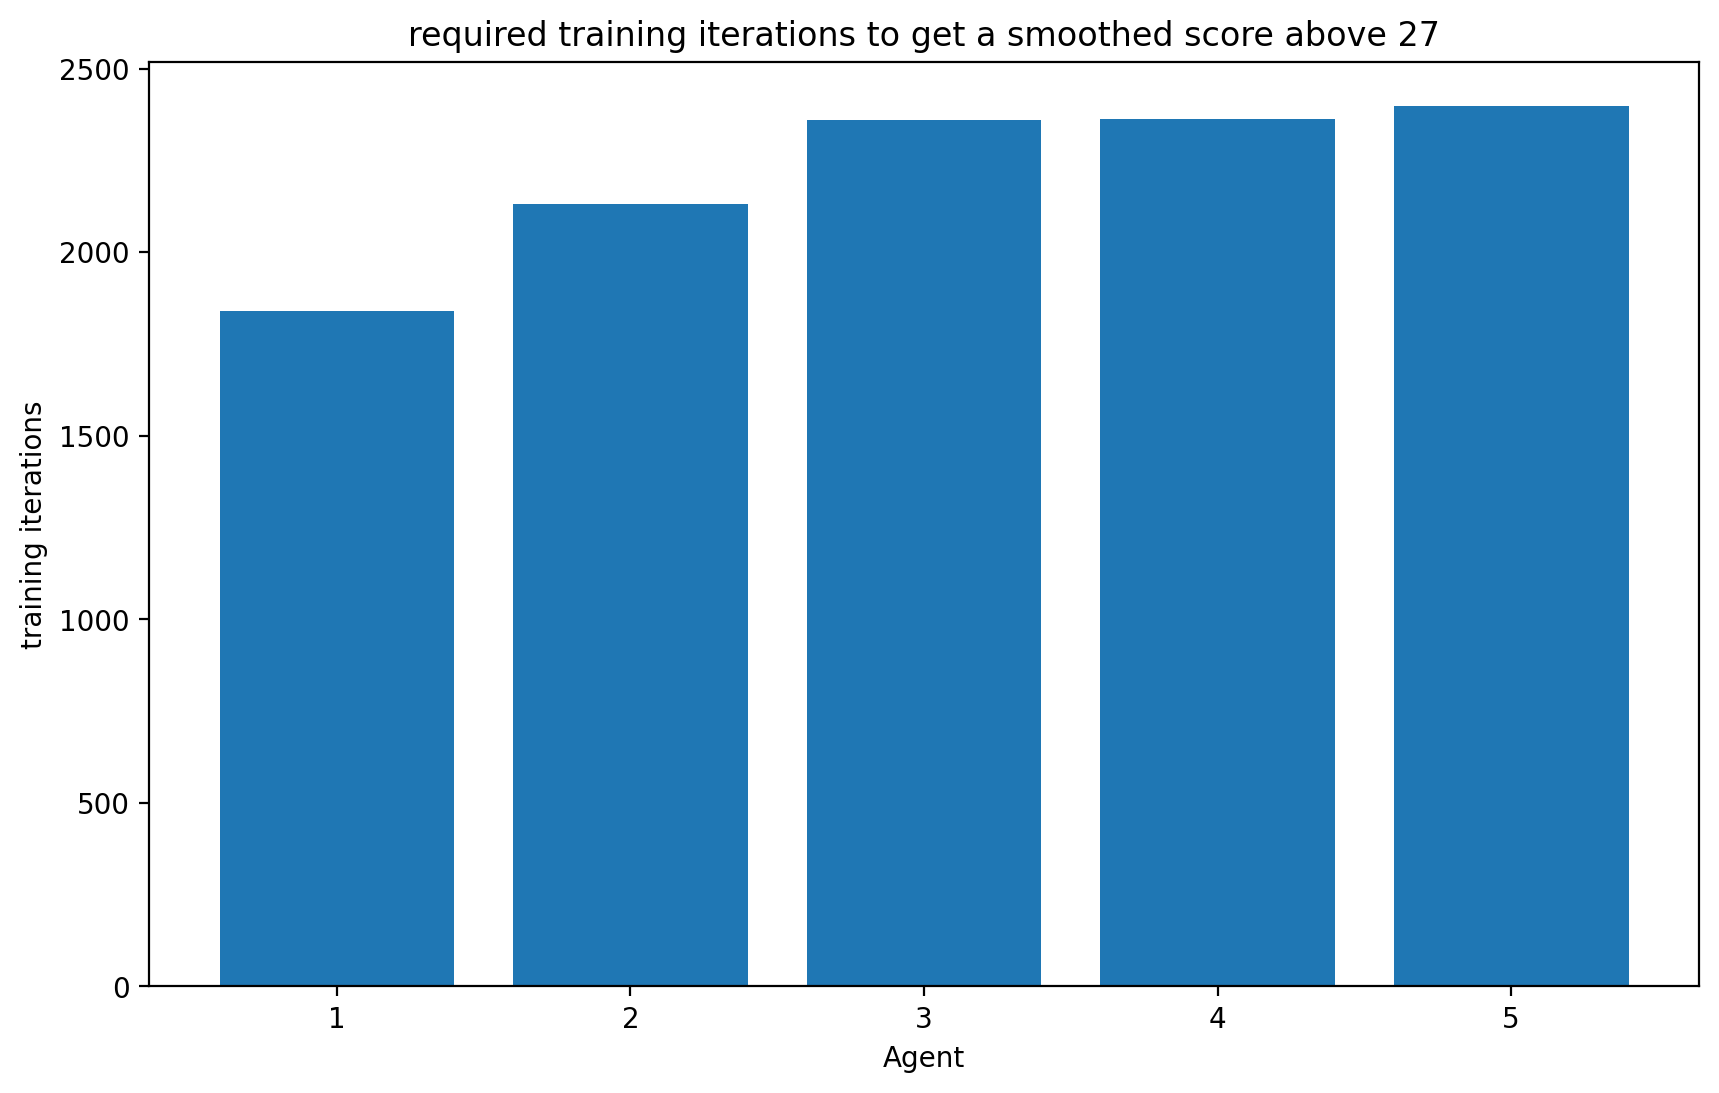

1 2126
2 2253
3 2857
4 2722
5 2812


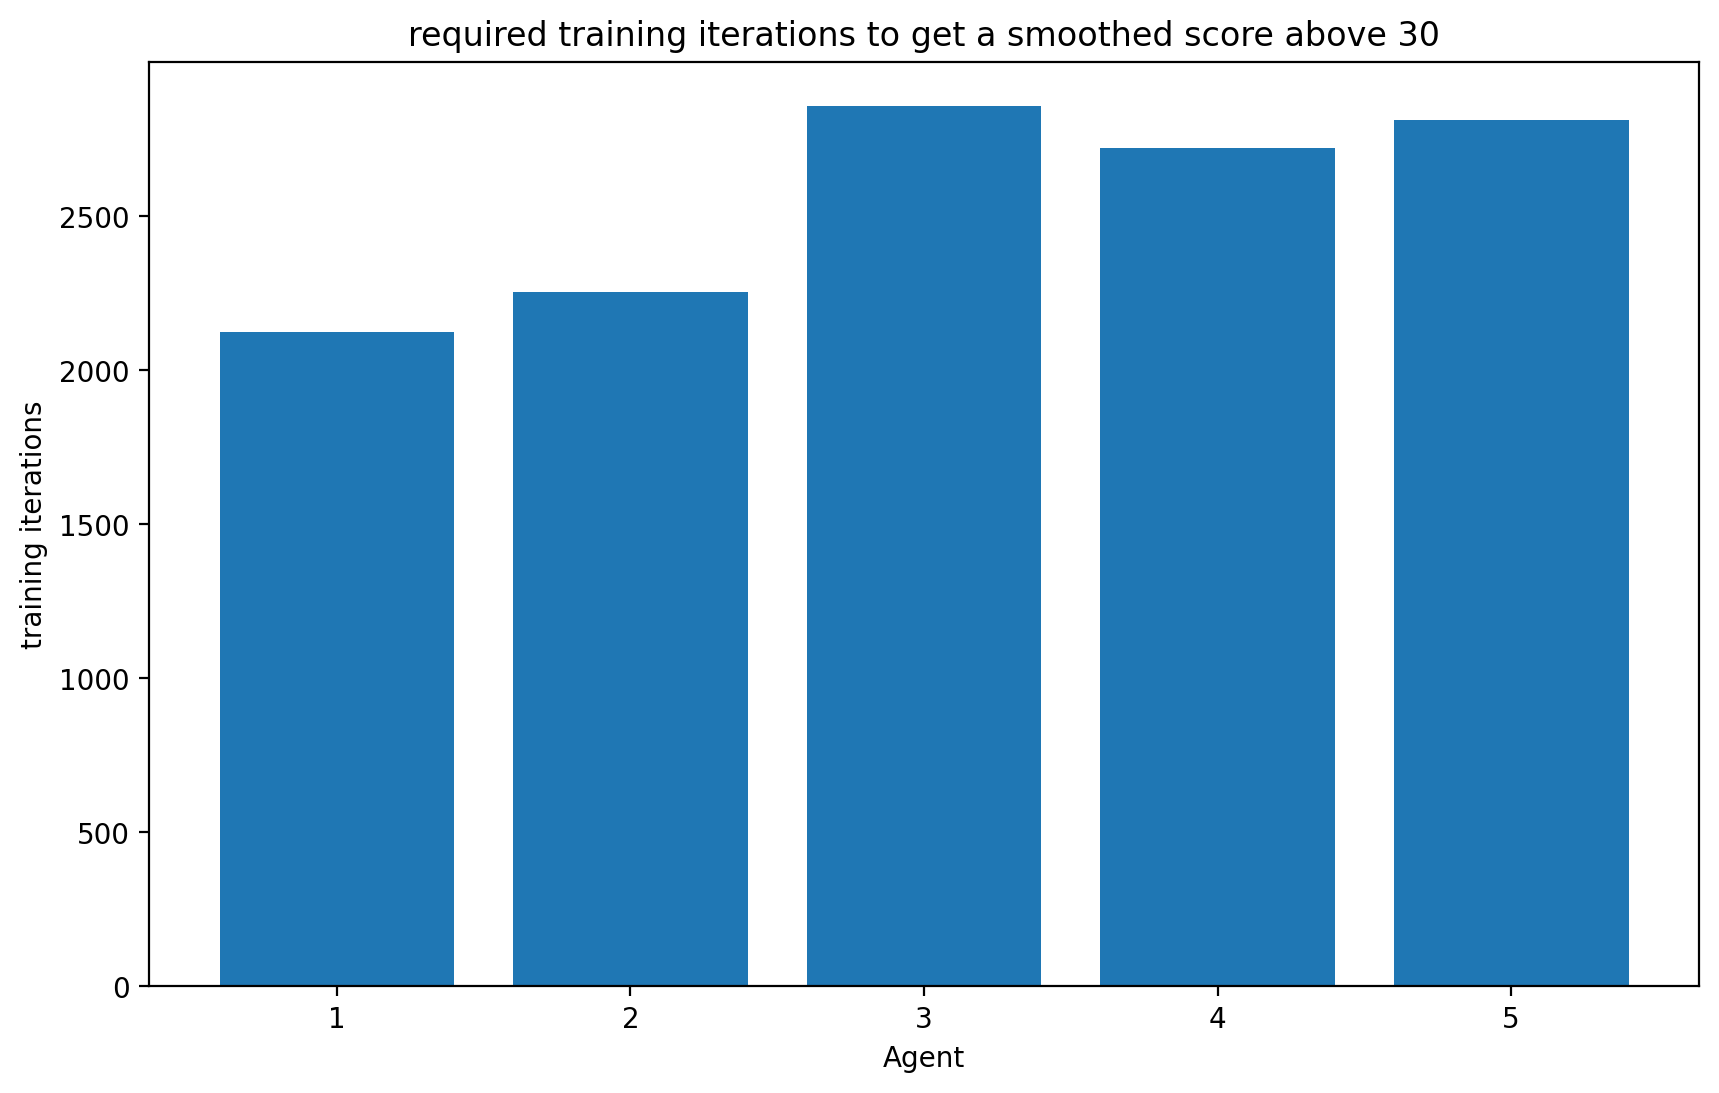

1 2167
2 2289
3 3087
4 3245
5 2842


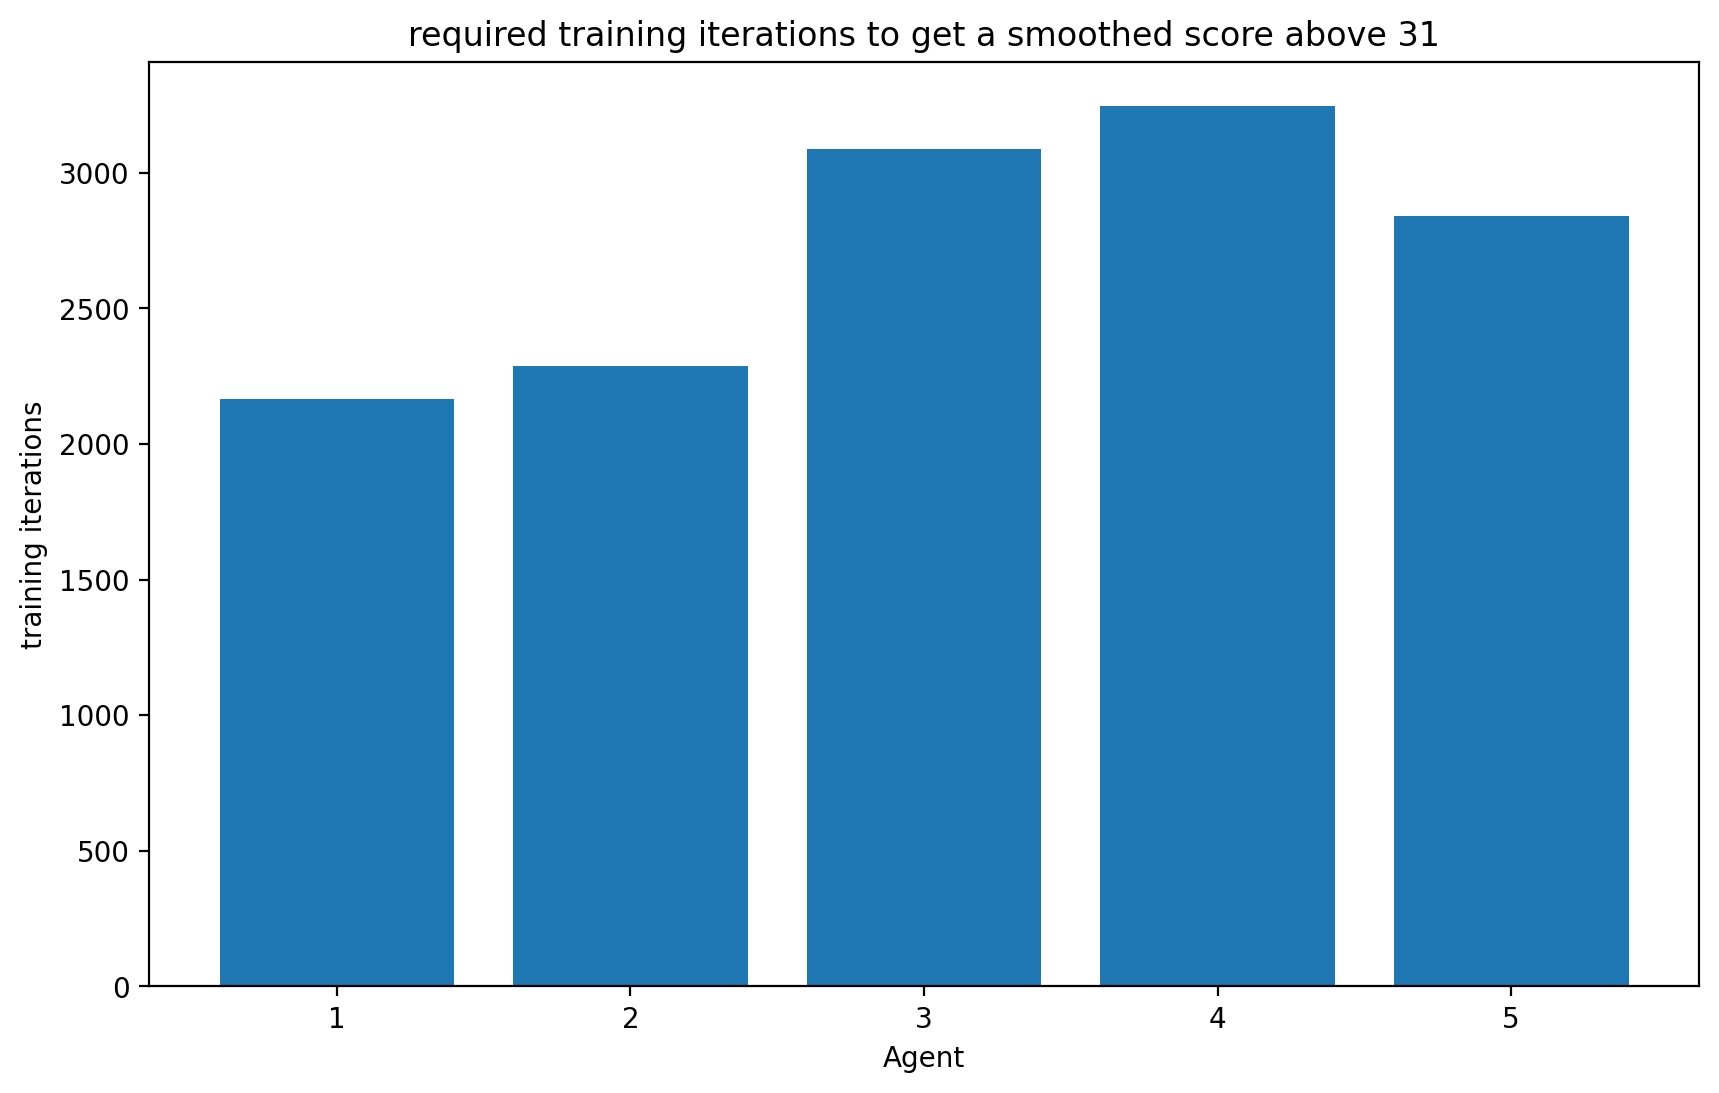

1 2218
2 2406
3 3829
4 8677
5 2954


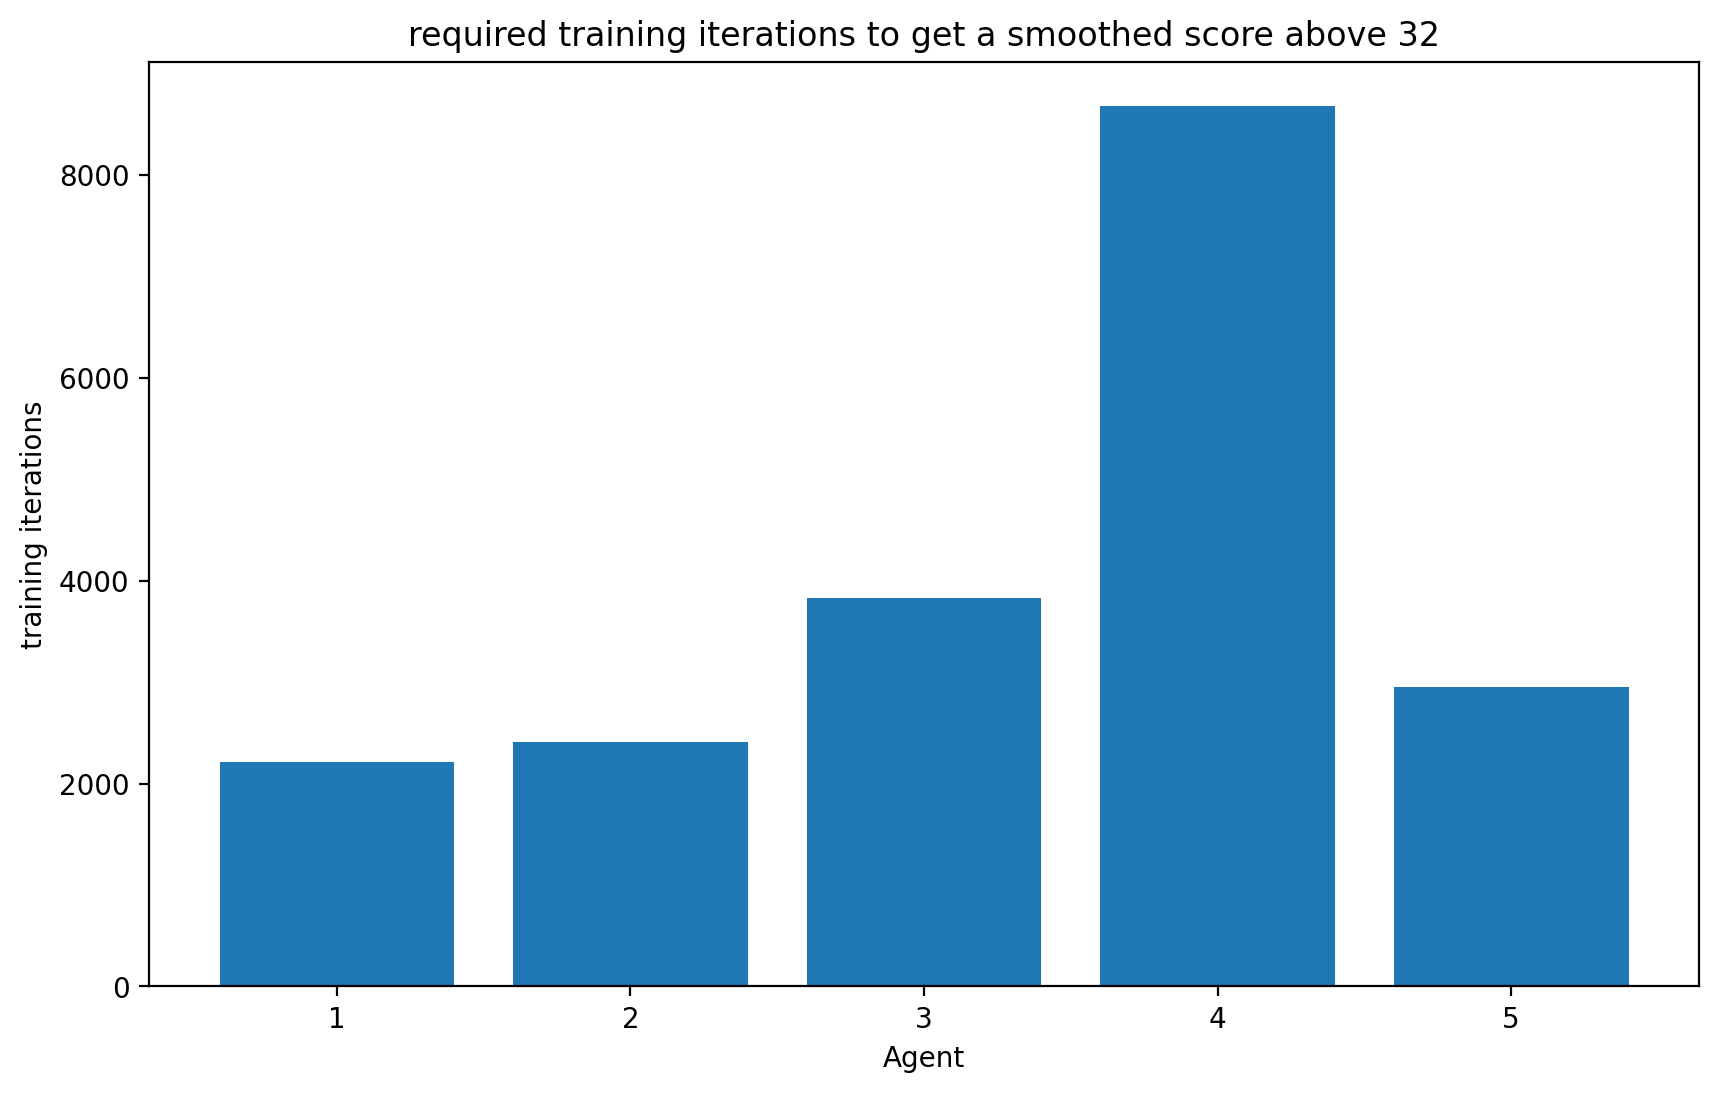

1 2288
2 2440
3 10012
4 12297
5 3211


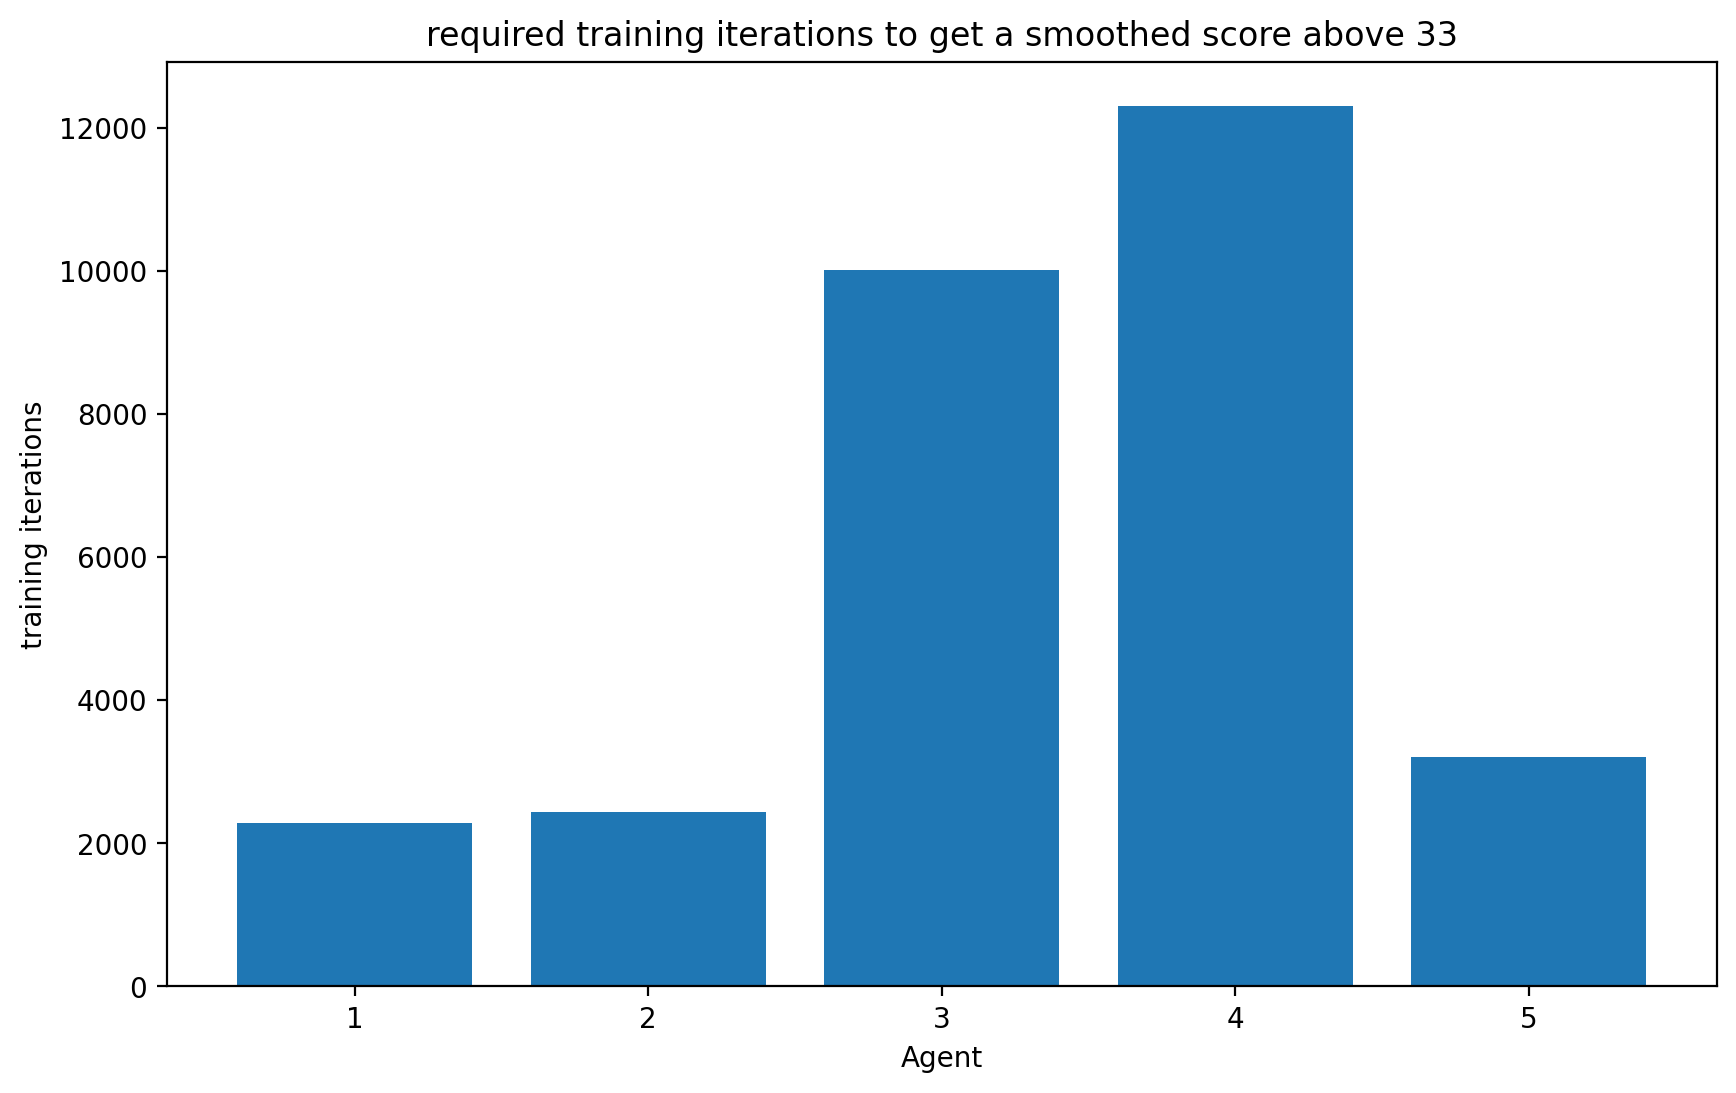

In [77]:
thresholds=[5,10,15,20,23,25,27,30,31,32,33]
for threshold in thresholds:
    bars = {}

    for index,array in arrays.items():
        print(index,y:=np.argmax(np.array(array)>=threshold)-12000)
        bars[index]=y
        #plt.scatter(index,y)
    plt.figure(figsize=(10, 6),dpi=200)
    plt.bar(bars.keys(),bars.values())
    plt.title(f"required training iterations to get a smoothed score above {threshold}")
    plt.ylabel("training iterations")
    plt.xlabel("Agent")

    plt.savefig(f"coin_train_threashold_{threshold}.png")
    plt.show()